In [9]:
import os
import re
import pandas as pd

# Directories
log_dirs = [
    "./speed_ping_logs_cloud_host_5000",
    "./speed_ping_logs_internal_host_5000",
    "./speed_ping_logs_network_host_5000"
]

# Regex to extract RTT times from ping output
rtt_pattern = re.compile(r'time=([\d.]+) ms')

# Storage
data = []

for folder in log_dirs:
    environment = os.path.basename(folder).replace("speed_ping_logs_", "").replace("_", " ").title()
    
    for filename in os.listdir(folder):
        if not filename.endswith(".log"):
            continue
        
        filepath = os.path.join(folder, filename)
        parts = filename.split("_")
        
        ip = ".".join(parts[:4])  # e.g., 192.168.122.34
        size = int(parts[4][1:])  # 's512' -> 512
        mode = int(parts[5][1:])  # 'm1' -> 1
        interval = int(parts[6].split('.')[0][1:-2])  # 'i100ms.log' -> 100

        with open(filepath, 'r') as file:
            rtts = [float(match.group(1)) for line in file for match in [rtt_pattern.search(line)] if match]

        if rtts:
            avg_rtt = sum(rtts) / len(rtts)
            data.append({
                "Environment": environment,
                "IP": ip,
                "Size": size,
                "Mode": mode,
                "Interval": interval,
                "AverageRTT": avg_rtt
            })

# Create DataFrame
df = pd.DataFrame(data)
df

,Environment,IP,Size,Mode,Interval,AverageRTT
0,Cloud Host 5000,1.1.1.1,512,1,24,18.33918
1,Cloud Host 5000,1.1.1.1,512,1,134,18.37836
2,Cloud Host 5000,1.1.1.1,512,1,78,17.87830
3,Cloud Host 5000,1.1.1.1,512,1,110,19.37666
4,Cloud Host 5000,1.1.1.1,512,1,168,21.43320
...,...,...,...,...,...,...
298,Network Host 5000,192.168.68.67,512,1,196,120.78860
299,Network Host 5000,192.168.68.67,512,1,98,5.39096
300,Network Host 5000,192.168.68.67,512,1,20,4.32244
301,Network Host 5000,192.168.68.67,512,1,58,4.87722


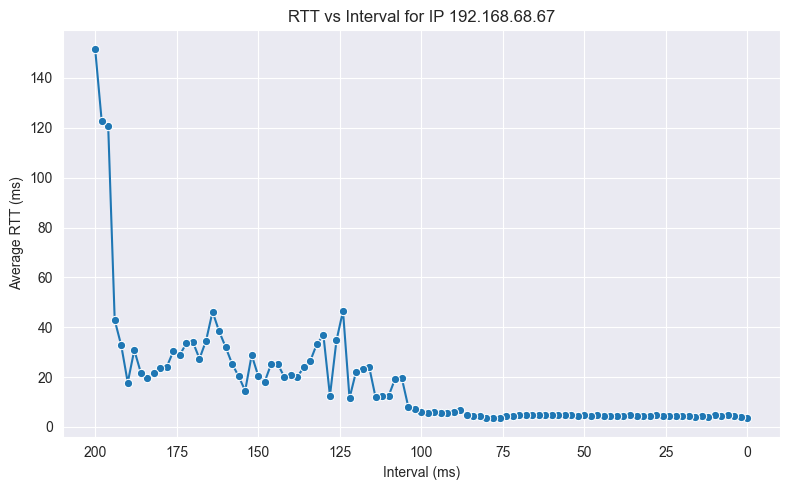

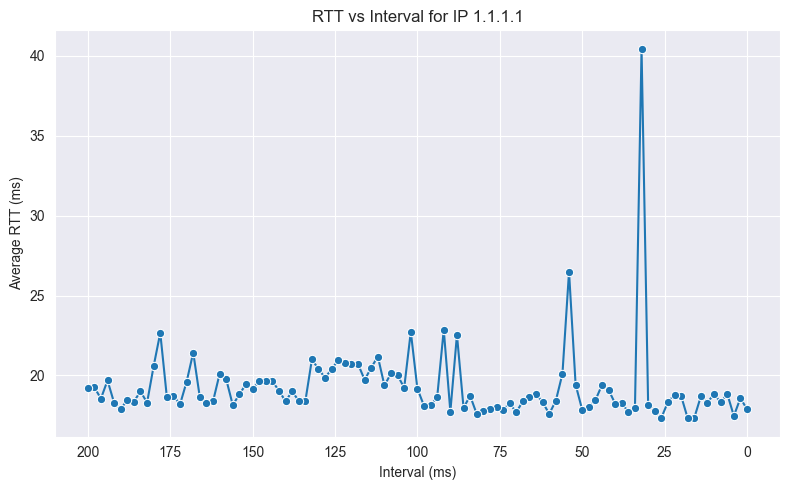

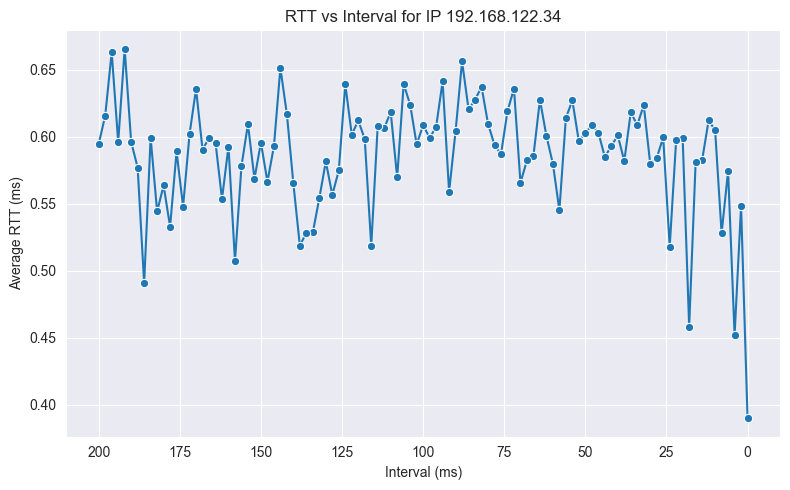

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Ensure interval is sorted descending
df_sorted = df.sort_values(by="Interval", ascending=False)

# Unique IPs
unique_ips = df_sorted["IP"].unique()

# One graph per IP
for ip in unique_ips:
    subset = df_sorted[df_sorted["IP"] == ip]

    plt.figure(figsize=(8, 5))
    sns.lineplot(data=subset, x="Interval", y="AverageRTT", marker='o')
    plt.title(f"RTT vs Interval for IP {ip}")
    plt.xlabel("Interval (ms)")
    plt.ylabel("Average RTT (ms)")
    plt.xticks(ticks=np.linspace(subset['Interval'].min(), subset['Interval'].max(), num=9, dtype=int))
    plt.gca().invert_xaxis()  # Optional: show from 200 → 0 left to right
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"rtt_vs_interval_{ip.replace('.', '_')}.png")  # Save figure
    plt.show()


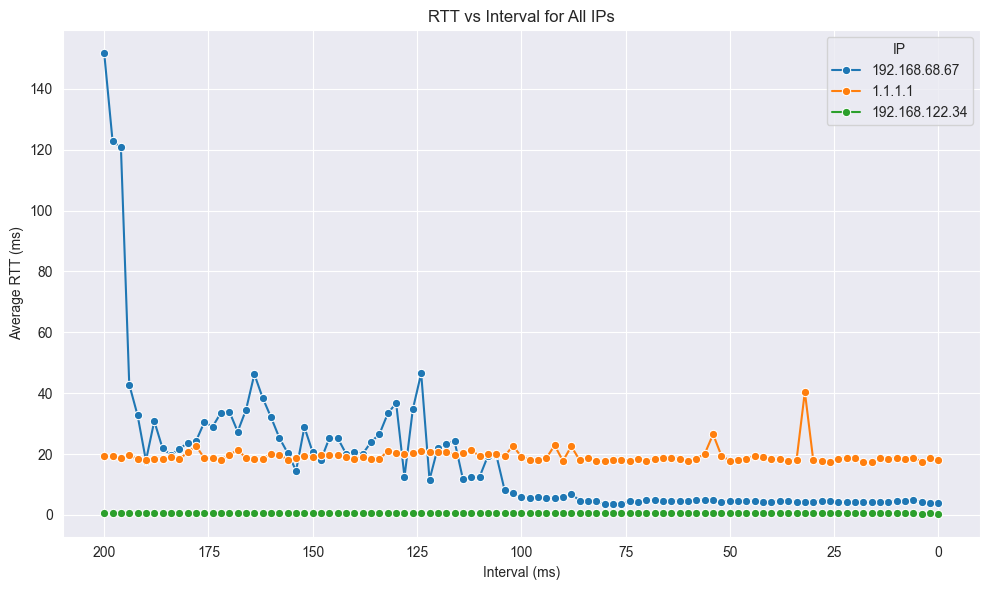

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure data is sorted properly
df_sorted = df.sort_values(by="Interval", ascending=False)

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_sorted, x="Interval", y="AverageRTT", hue="IP", marker='o')

plt.title("RTT vs Interval for All IPs")
plt.xlabel("Interval (ms)")
plt.ylabel("Average RTT (ms)")
plt.gca().invert_xaxis()  # Optional: show from 200 → 0 left to right
plt.grid(True)
plt.tight_layout()
plt.savefig("rtt_vs_interval_all_ips.png")
plt.show()
